In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Select only setosa and versicolor classes which are linearly separable
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a LinearSVC instance
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)

# Train the model
svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test_scaled)

# Evaluate the model
print("Test set accuracy: ", accuracy_score(y_test, y_pred))

Test set accuracy:  1.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


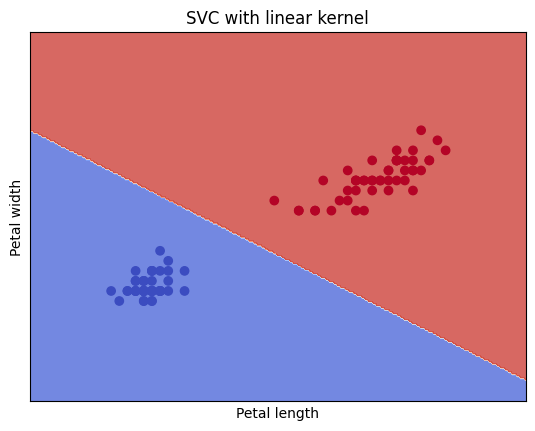

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Standardize the mesh grid points
XX = scaler.transform(np.c_[xx.ravel(), yy.ravel()])

# Predict the function value for the whole grid
Z = svm_clf.predict(XX)
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')
plt.show()

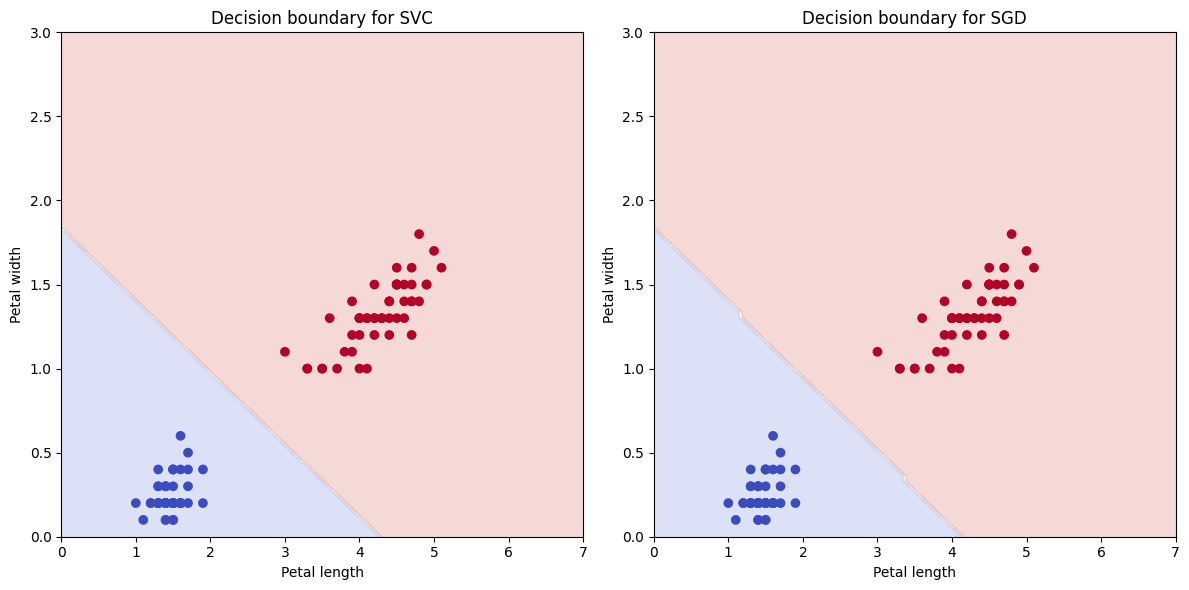

In [9]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# Create SVC with linear kernel
svc_clf = SVC(kernel='linear', C=1, random_state=42)

# Train the model
svc_clf.fit(X_train_scaled, y_train)

# Create SGDClassifier
sgd_clf = SGDClassifier(loss='hinge', alpha=1/(1*len(X_train_scaled)), random_state=42)

# Train the model
sgd_clf.fit(X_train_scaled, y_train)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    X_new_scaled = scaler.transform(X_new)
    y_pred = clf.predict(X_new_scaled).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.2, cmap=plt.cm.coolwarm)

# Plot decision boundary for SVC
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_decision_boundary(svc_clf, X, y, [0, 7, 0, 3])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision boundary for SVC')

# Plot decision boundary for SGD
plt.subplot(122)
plot_decision_boundary(sgd_clf, X, y, [0, 7, 0, 3])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision boundary for SGD')

plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVC
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test_scaled)

# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



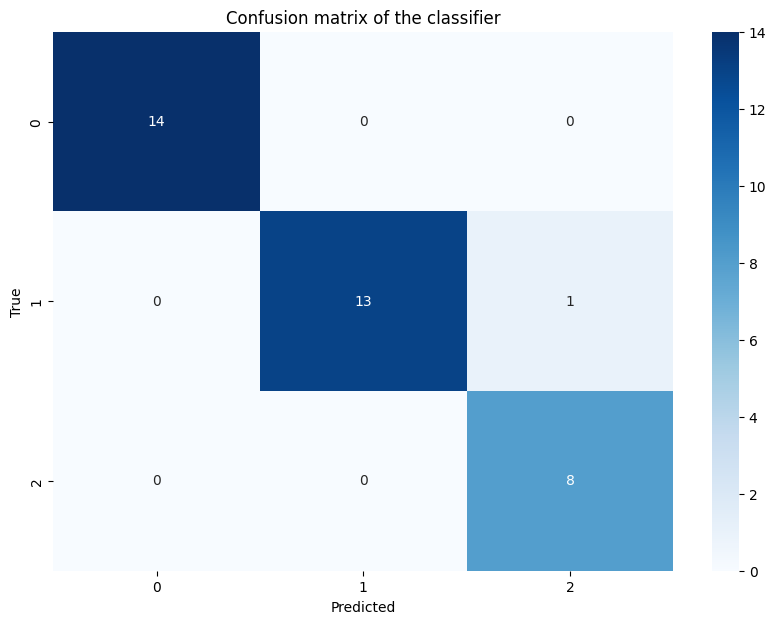

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of the classifier')
plt.show()